<a href="https://colab.research.google.com/github/SiddhantIQByte/Practice-DL-projects/blob/main/Churn_Pred_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf

#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# New section

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('Churn_Modelling.csv')

In [35]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [36]:
## Divide the dataset into ind and dep features

In [37]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [38]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [39]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [40]:
## Feature Eng

In [41]:
geography=pd.get_dummies(X['Geography'], drop_first =True)
gender=pd.get_dummies(X['Gender'], drop_first =True)

In [42]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [43]:
## CONCATENATE THESE VAR WITH DF


In [44]:
X=X.drop(['Geography','Gender'], axis=1)

In [45]:
X=pd.concat([X,geography,gender], axis=1)

In [46]:
## SPlitting the df into training and test state

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.15,random_state=2)

In [49]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
X_test

array([[ 0.83700054, -0.09148023,  1.72096942, ..., -0.5855015 ,
        -0.57390878, -1.08527045],
       [-0.04938797,  0.19359198, -1.04507768, ...,  1.70793755,
        -0.57390878, -1.08527045],
       [-0.32767273,  1.61895303,  0.68370176, ..., -0.5855015 ,
        -0.57390878,  0.92142931],
       ...,
       [ 2.06351487,  0.66871233,  1.37521353, ..., -0.5855015 ,
        -0.57390878,  0.92142931],
       [-0.07000165, -0.85167279, -0.00781002, ..., -0.5855015 ,
        -0.57390878,  0.92142931],
       [-0.32767273, -0.09148023, -0.00781002, ..., -0.5855015 ,
         1.74243719,  0.92142931]])

In [51]:
X_train.shape

(8500, 11)

Create ANN


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [53]:
## Let's initialize ANN

In [54]:
classifier= Sequential()

In [55]:
#Adding the input layer

In [56]:
classifier.add(Dense(units=11,activation='relu'))

In [75]:
## Adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [77]:
## Adding 2nd hidden layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.25))

In [78]:
## Adding O/P hidden layer

In [79]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [80]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [81]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
570/570 [==============================] - 6s 5ms/step - loss: 0.4640 - accuracy: 0.7884 - val_loss: 0.4176 - val_accuracy: 0.7986
Epoch 2/50
570/570 [==============================] - 3s 5ms/step - loss: 0.4434 - accuracy: 0.7889 - val_loss: 0.4108 - val_accuracy: 0.7986
Epoch 3/50
570/570 [==============================] - 3s 6ms/step - loss: 0.4405 - accuracy: 0.7889 - val_loss: 0.4125 - val_accuracy: 0.7986
Epoch 4/50
570/570 [==============================] - 3s 5ms/step - loss: 0.4300 - accuracy: 0.7889 - val_loss: 0.4096 - val_accuracy: 0.7986
Epoch 5/50
570/570 [==============================] - 3s 5ms/step - loss: 0.4351 - accuracy: 0.7889 - val_loss: 0.4046 - val_accuracy: 0.7986
Epoch 6/50
570/570 [==============================] - 3s 5ms/step - loss: 0.4277 - accuracy: 0.7889 - val_loss: 0.4014 - val_accuracy: 0.7986
Epoch 7/50
570/570 [==============================] - 4s 7ms/step - loss: 0.4324 - accuracy: 0.7889 - val_loss: 0.4062 - val_accuracy: 0.7986
Epoch 

In [83]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

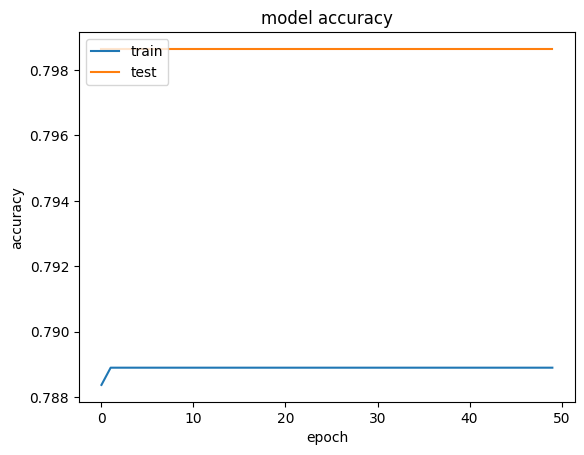

In [84]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

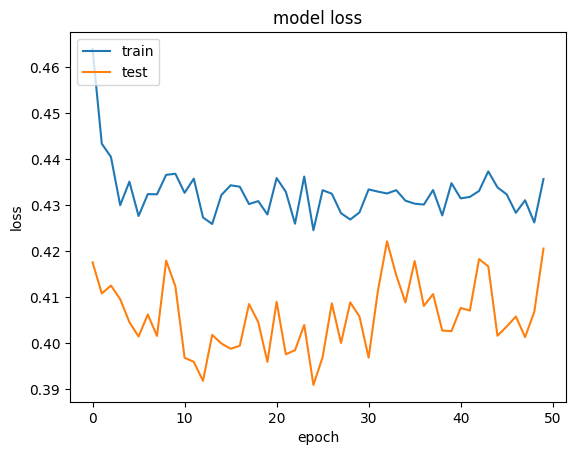

In [85]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [86]:
y_pred = classifier.predict(X_test)
y_pred=(y_pred>=0.5)

47/47 [==============================] - 0s 3ms/step


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [88]:
cm

array([[1230,    0],
       [ 270,    0]])

In [89]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [90]:
score

0.82

In [91]:
##get the weights

In [92]:
classifier.get_weights()

[array([[-1.7039518e+00, -1.2728872e+00, -9.9772596e-01, -1.0214577e+00,
          3.1972213e+00, -1.7344813e-01, -6.1059910e-01,  1.3422303e+00,
         -1.7444915e+00, -2.0151669e-01, -1.8260268e+00],
        [ 1.1702125e+00, -2.2459319e+00, -3.7262051e+00, -3.5615423e+00,
         -1.4996554e+00,  2.1148350e+00, -3.0560303e+00, -1.9257163e+00,
          2.5869644e+00,  3.6181788e+00, -8.9449424e-01],
        [-1.9250350e-01,  1.7095158e+00,  1.4106001e+00, -1.5816728e+00,
          1.5014517e-02, -7.9168218e-01, -2.2069509e+00,  1.0335706e+00,
          2.7073315e-01,  2.1641959e-01,  2.9243228e+00],
        [-3.4651828e+00, -2.3191226e+00, -5.2037370e-01, -3.9424777e+00,
          1.2221918e+00,  2.0648704e+00,  3.8357174e+00, -6.6624606e-01,
         -3.7508085e+00, -1.9570550e+00, -4.1274953e-01],
        [-1.4122735e+00,  1.6426216e+00, -9.2284441e-02, -3.3417654e+00,
         -3.8638857e-01,  6.4252744e+00, -1.6726235e+00,  4.8214374e+00,
         -7.7131047e+00, -1.2927191e-0